In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **TPS - AUG 2021** 
## ***EDA analysis and Prediction using AutoML***

In [ ]:
### Table of content
#### 1)dataset overview
#### 2)Univariate analysis
#### 3)bivariate analysis
#### 4)AutoML to prediction

In [ ]:
#import packages
import numpy as np
import pandas as pd 
#import matplotlib as mpl
import h2o
from h2o.automl import H2OAutoML
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_pd = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv')
test_pd = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv')

In [ ]:
#dataset information
train_pd.info()

In [ ]:
#check the columns of data
train_pd.columns

In [ ]:
# datatypes of data
train_pd.dtypes

In [ ]:
train_pd.describe()

In [ ]:
#checking Null values
train_pd.isna().sum().sum()
#there is no null values in dataset.

In [ ]:
fig = plt.subplots(figsize = (15,8))
sns.countplot(x='loss',data=train_pd)

In [ ]:
#loss variable analyis
sns.boxplot(data=train_pd, x='loss')
plt.title(" loss distribution")
plt.show()
# loss traget variable is lest skewed.

In [ ]:
#categorical values
cat_var= ['f1', 'f16', 'f27', 'f55', 'f60', 'f86', 'loss']

In [ ]:
train_pd.corr().unstack().sort_values().drop_duplicates()

In [ ]:
plt.figure(figsize=(14 , 14))
corr = train_pd.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, mask = mask, cmap='coolwarm_r', annot_kws={'size':20})

In [ ]:
#histogram of numeric values.
num_col= [col for col in train_pd.columns if (col not in cat_var) ]
plt.figure(figsize=(100, 100))
i=1
for col in num_col:
    plt.subplot(10,10,i)
    sns.histplot(data=train_pd, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.show()

### Automl

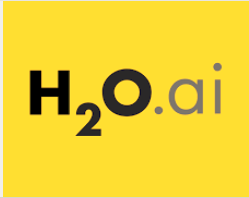

In [ ]:
h2o.init()

In [ ]:
#import train test files
train = h2o.import_file('../input/tabular-playground-series-aug-2021/train.csv')
test = h2o.import_file('../input/tabular-playground-series-aug-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
x = train.columns
y = "loss"
x.remove(y)
x.remove("id") #removing id  

In [ ]:
aml = H2OAutoML(max_runtime_secs=5000, seed=1)
aml.train(x=x, y=y, training_frame=train)

In [ ]:
lb = aml.leaderboard
lb.head() 

In [ ]:
preds = aml.predict(test)

In [ ]:
## create submission

sample_submission['loss'] = h2o.as_list(preds)['predict']
sample_submission.to_csv("submission.csv",index=None)
sample_submission.head()

#####  Thank You